In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import precision_score, recall_score

C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8


In [6]:
# Checking null values
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

## Data Wrangling

In [7]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [8]:
# Grouping Data by Gender
df.groupby("Heart_ stroke").mean().T

Heart_ stroke,No,yes
age,48.767668,54.145963
currentSmoker,0.489983,0.517081
cigsPerDay,8.710401,10.629283
BPMeds,0.023367,0.064771
prevalentHyp,0.275737,0.504658
diabetes,0.019199,0.062112
totChol,235.172530,245.388976
sysBP,130.333612,143.618789
diaBP,82.160963,86.981366
BMI,25.673007,26.531451


- People with risk of Heart Stroke are on average older than those who don't possess the risk.
- People with risk of Heart Stroke tend to smoke more cigarettes than those who don't possess the risk.
- People with risk of Heart Stroke have higher blood pressure than those who don't possess the risk.
- People with risk of Heart Stroke have higher glucose level than those who don't possess the risk.

In [9]:
# Grouping Data by Gender
df.groupby("Gender").mean().T

Gender,Female,Male
age,49.800331,49.298516
currentSmoker,0.408433,0.608026
cigsPerDay,5.719634,13.376177
BPMeds,0.037379,0.019401
prevalentHyp,0.308392,0.313359
diabetes,0.023563,0.028587
totChol,239.459596,233.131347
sysBP,133.040099,131.437878
diaBP,82.295163,83.689115
BMI,25.512636,26.185656


- Men tend to smoke more cigerettes per day when compared to women.
- Men have higher BMI & Glucose level than women.
- Women have higher Cholestrol level, Blood Pressure level, Heart rate compared to men.

In [10]:
# Grouping Data by currentSmoker
df.groupby("currentSmoker").mean().T

currentSmoker,0,1
age,51.395522,47.731137
cigsPerDay,0.000000,18.350605
BPMeds,0.037843,0.021246
prevalentHyp,0.357743,0.262178
diabetes,0.032649,0.018625
totChol,238.767059,234.614639
sysBP,135.188433,129.448663
diaBP,84.161614,81.595033
BMI,26.478701,25.110724
heartRate,75.138060,76.637840


- People having risk of Heart Stroke tends to smoke 18 cigarettes per day.
- People having risk of Heart Stroke have lower cholestrol level, diastolic blood pressure.
- People having risk of Heart Stroke have higher systolic blood pressure, heart rate and glucose level.

In [11]:
# Grouping Data by diabetes
df.groupby("diabetes").mean().T

diabetes,0,1
age,49.443933,54.926606
currentSmoker,0.497699,0.357798
cigsPerDay,9.075122,6.293578
BPMeds,0.028200,0.084112
prevalentHyp,0.304674,0.532110
totChol,236.429412,247.759259
sysBP,131.953984,147.444954
diaBP,82.796077,86.582569
BMI,25.744730,28.003178
heartRate,75.783188,79.504587


- On average, people with diabetes have higher total cholestrol levels, blood pressure, BMI, heart rate and significantly higher levels of glucose. They also possess a greater risk of Heart Stroke.

In [12]:
# Grouping Data by people having Hypertension.
df.groupby("prevalentStroke").mean().T

prevalentStroke,no,yes
age,49.546879,56.000000
currentSmoker,0.495371,0.280000
cigsPerDay,9.033222,3.960000
BPMeds,0.028118,0.291667
prevalentHyp,0.307857,0.760000
diabetes,0.025635,0.040000
totChol,236.721355,236.760000
sysBP,132.255637,148.660000
diaBP,82.852006,89.880000
BMI,25.794187,27.228696


- On average, people with prevalent history of hypertension have higher total cholestrol, blood pressure, BMI, heart rate and glucose levels. They also possess greater risk of Heart Stroke.

## Data Visualisation

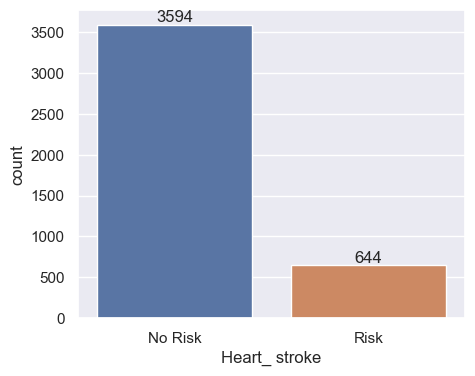

In [13]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df["Heart_ stroke"])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(["No Risk", "Risk"])
plt.show()

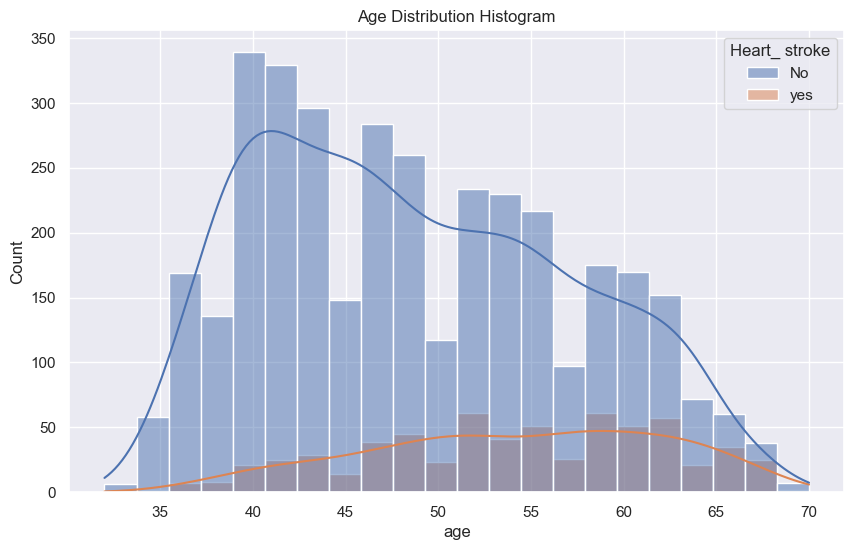

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="Heart_ stroke", kde=True)
plt.title("Age Distribution Histogram")
plt.show()

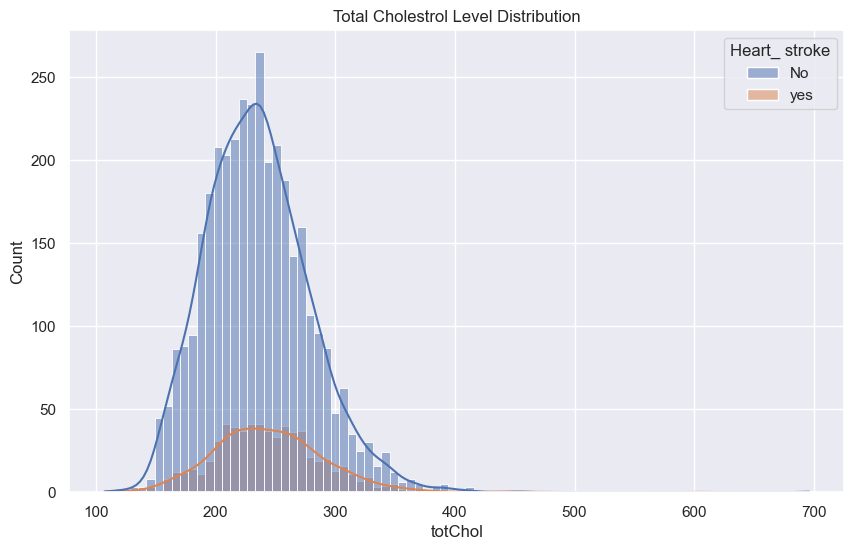

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="totChol", hue="Heart_ stroke", kde=True)
plt.title("Total Cholestrol Level Distribution")
plt.show()

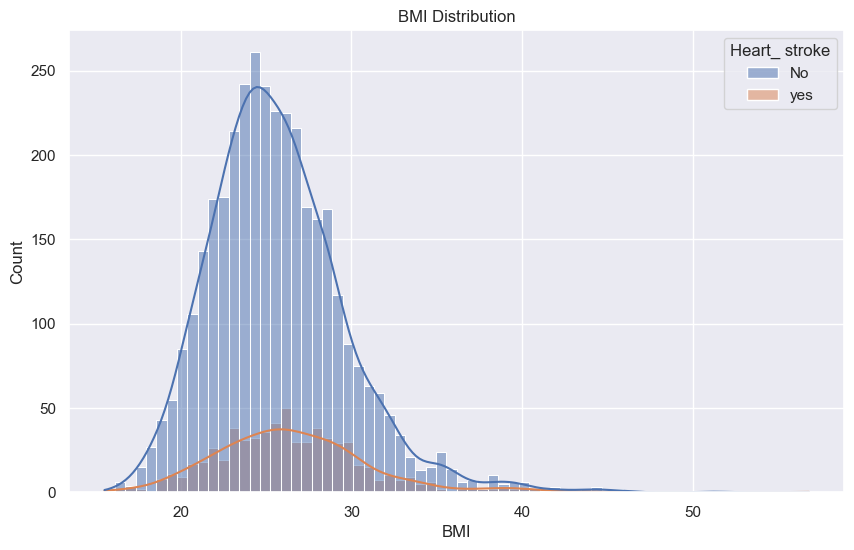

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="BMI", hue="Heart_ stroke", kde=True)
plt.title("BMI Distribution")
plt.show()

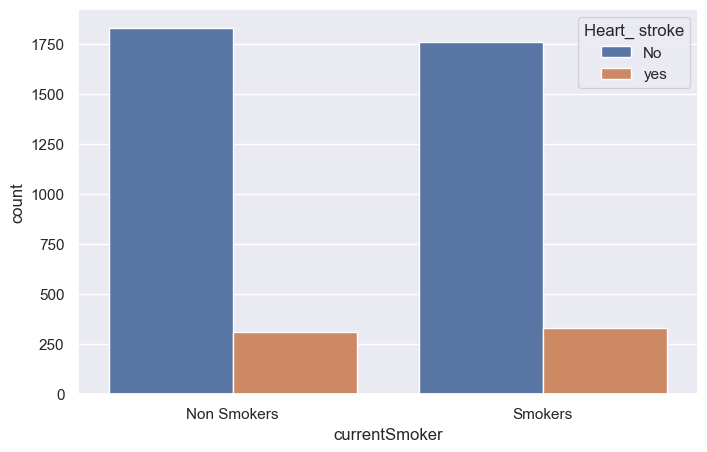

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="currentSmoker", hue="Heart_ stroke")
ax.set_xticklabels(["Non Smokers", "Smokers"])
plt.show()

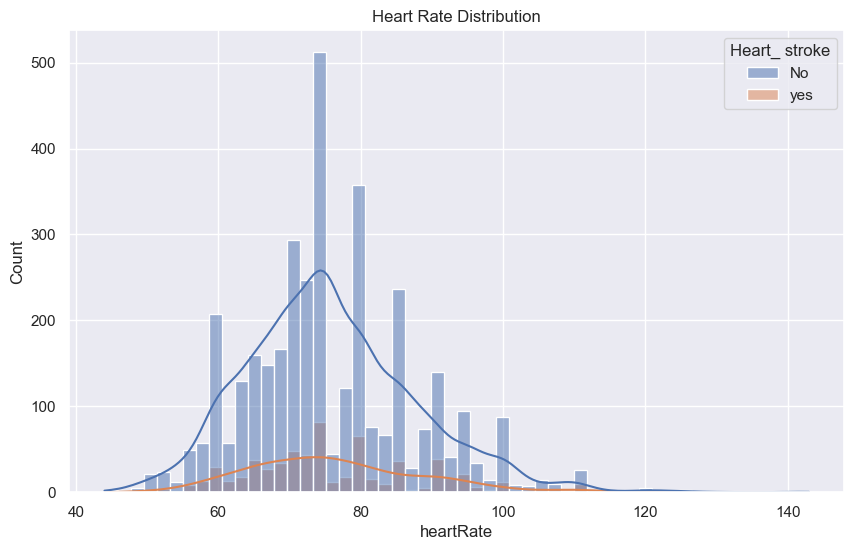

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="heartRate", hue="Heart_ stroke", kde=True)
plt.title("Heart Rate Distribution")
plt.show()

<Figure size 1500x800 with 0 Axes>

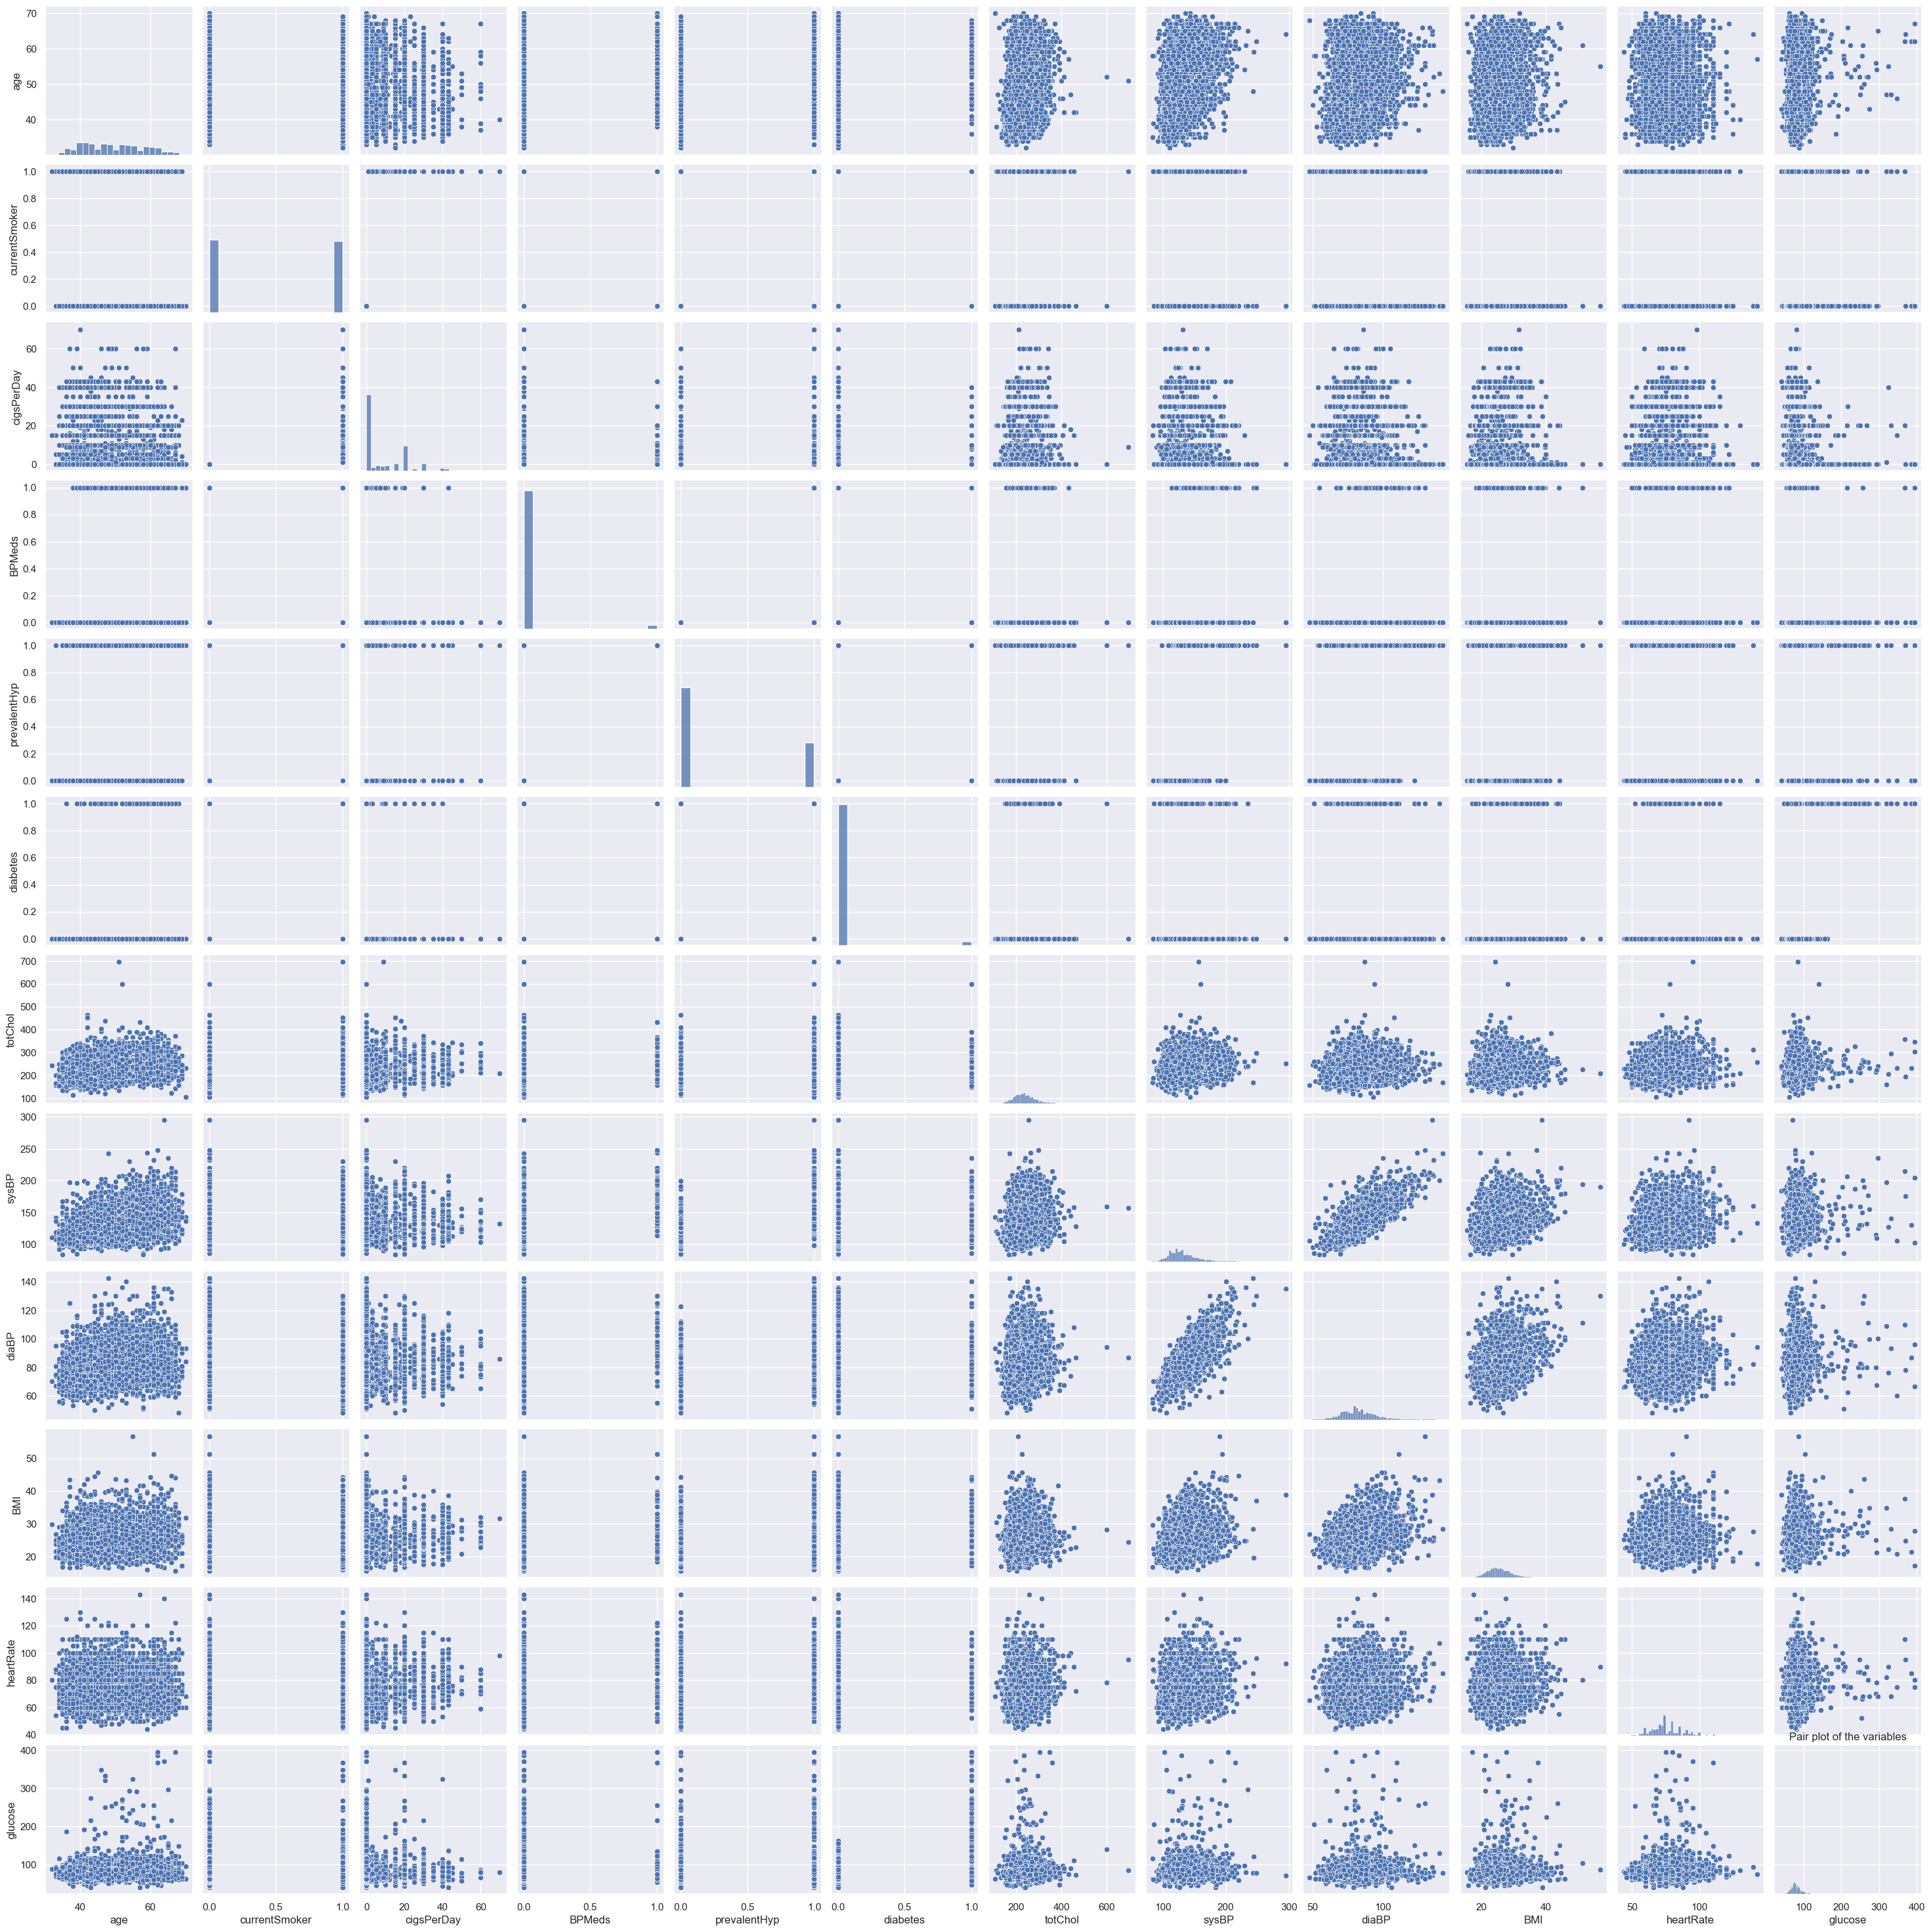

In [19]:
# Pairplot
plt.figure(figsize=(15, 8))
sns.pairplot(df)
plt.title("Pair plot of the variables")
plt.show()
plt.show()

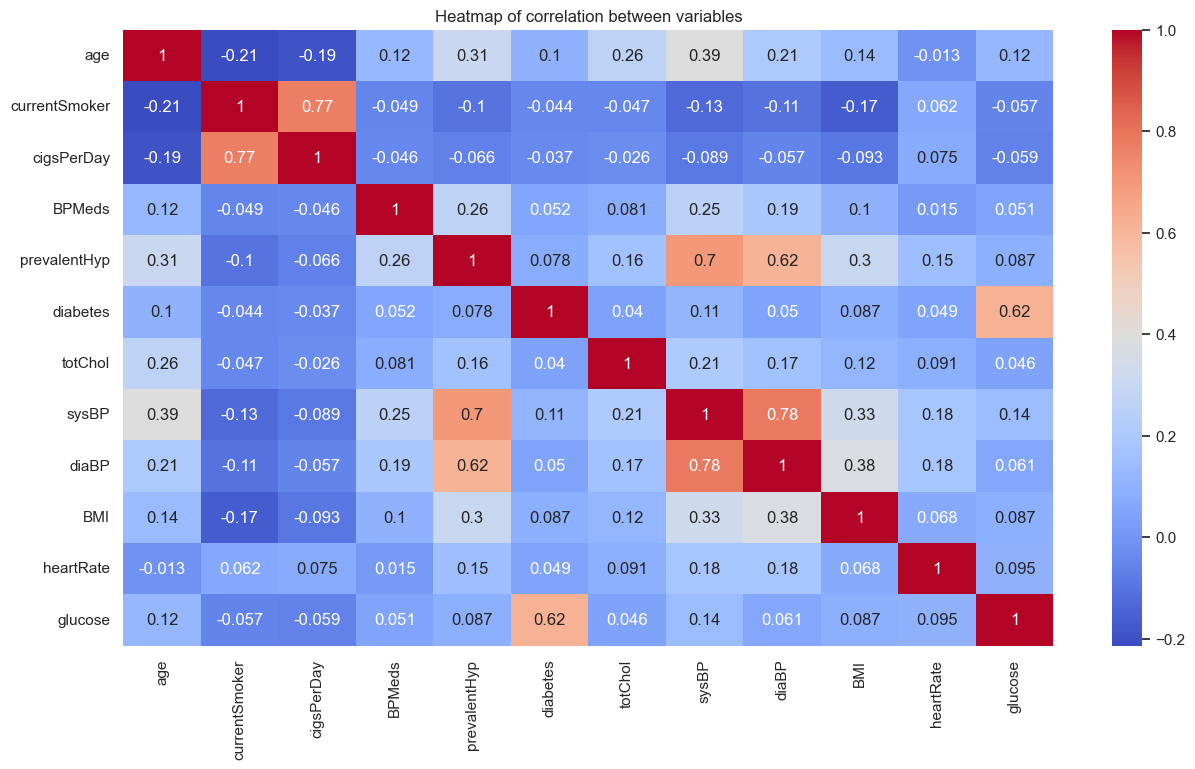

In [20]:
# Heatmap

corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap of correlation between variables")
plt.show()

## Feature Engineering

In [21]:
# Handling Missing Values

df["glucose"] = df["glucose"].fillna(df["glucose"].median())
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].median())
df["totChol"] = df["totChol"].fillna(df["totChol"].median())
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].mode()[0])
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].mode()[0])
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

In [22]:
def soft_cap_outliers(data, cols):
    """
    Function to softcap outliers.
    Args:
        df(pd.DataFrame): given dataframe
        cols(list): list of columns for which soft capping is required
        
    Returns:
        data: modified data with soft capped outliers
    """
    for col in cols:
        quantile = df[col].quantile(0.99)
        data[col] = df[col].apply(lambda x: quantile if x > quantile else x)
    return data

In [23]:
cols = ["cigsPerDay", "totChol", "sysBP", "BMI", "heartRate", "glucose"]
df = soft_cap_outliers(df, cols)

In [24]:
df = df.drop(["education", "currentSmoker", "diaBP", "prevalentStroke"], axis=1)

In [25]:
df["Gender"] = df.Gender.apply(lambda x: 1 if x == "Male" else 0)
df.head(2)

,Gender,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,0.0,0.0,0,0,195.0,106.0,26.97,80.0,77.0,No
1,0,46,0.0,0.0,0,0,250.0,121.0,28.73,95.0,76.0,No


In [26]:
X = df.drop(labels='Heart_ stroke', axis=1)
y = df['Heart_ stroke']

In [27]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print(f"X shape before resampling :{X.shape} | y shape before resampling {y.shape}")
print(f"X shape after resampling :{X_resampled.shape} | y shape after resampling {y_resampled.shape}")


## Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, stratify=y_resampled)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train, y_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
lc = LazyClassifier()
lc.fit(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

In [ ]:
y_test_pred = rfc.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=rfc.classes_).plot()
plt.title('Confusion Matrix of Test Data')
plt.show()

In [ ]:
print('Classification Report: \n', classification_report(y_test, y_test_pred))

## Saving model

In [ ]:
import pickle
filename = 'Diabetes_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
# Saving the imports used in this project
import session_info

session_info.show(write_req_file=True, req_file_name='requirements.txt')

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('Diabetes_model.sav', 'rb'))

input_data =  (0,47,25,0.00,1,1,304.00,102.24,24.56,97.45,67.54)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has low risk of heart stroke.')
else:
  print('The person has high risk of heart stroke.')

In [ ]:
X_test